In [1]:
from inspect_ai.log import read_eval_log
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

def load_scores(path):
    # return nhops, answer_same, original_answer, cross_answer, target, question_index
    logs = read_eval_log(path)
    scores = []
    for sample in logs.samples:
        metadata = sample.metadata
        score_key = list(sample.scores.keys())[0]
        score = sample.scores[score_key]
        if score.metadata is not None:
            scores.append((
                metadata['nhops'], 
                score.value,
            ))
        else:
            scores.append((metadata['nhops'], score.value, None, None, None, None, None))

    df = pd.DataFrame(scores, columns=[
        'nhops', 'correct',
    ])
    return df

In [2]:
glob = '../logs/paired_data_test/'

data = {}
for log in os.listdir(glob):
    for file in os.listdir(os.path.join(glob, log)):
        if file.endswith('.eval'):
            scores = load_scores(os.path.join(glob, log, file))
            if log == 'default':
                log = 'default_paired'
            data[log] = scores

data.keys()

dict_keys(['default_paired', 'single_no_distractors', 'single', 'no_distractors', 'original', 'no_distractors_slim'])

Text(0, 0.5, 'Performance')

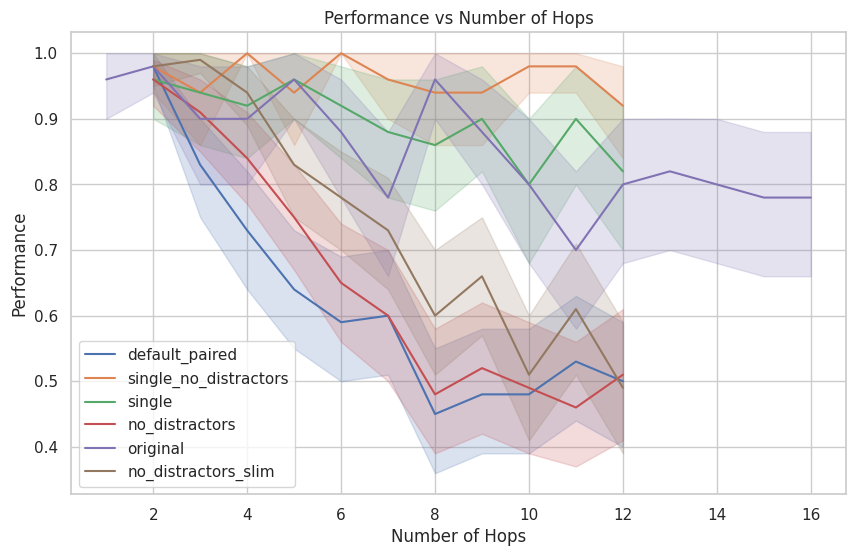

In [3]:
# Plot correct vs nhops
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
for log in data.keys():
    sns.lineplot(x="nhops", y="correct", data=data[log], errorbar='ci', label=log)
plt.title('Performance vs Number of Hops')
plt.xlabel('Number of Hops')
plt.ylabel('Performance')